In [169]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [170]:
listings_raw= pd.read_csv(r'C:\Users\user\Desktop\Ryerson University\Projects\My Project CIND820\Public Data\listings_Toronto_Dec_5.csv')
print(f"The dataset contains {len(listings_raw)} Airbnb listings")
pd.set_option('display.max_columns', len(listings_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
listings_raw.head(3)

The dataset contains 15261 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20211205213140,2021-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire residential home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",$469.00,28,730,28.0,28.0,730.0,730.0,28.0,730.0,NaN,t,0,0,0,0,2021-12-06,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20211205213140,2021-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",$96.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,30,60,90,365,2021-12-06,169,0,0,2012-09-05,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.50
2,23691,https://www.airbnb.com/rooms/23691,20211205213140,2021-12-06,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in residential home,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",$72.00,28,28,28.0,28.0,28.0,28.0,28.0,28.0,NaN,t,30,60,90,365,2021-12-06,217,0,0,2011-08-22,2018-10-10,4.75,4.7

In [171]:
#Dropping initial columns
# As I am not using Natural Language Processing in creating the model, all free text columns will be dropped the columns assumed to be irrelevant to price(e.g. url, host name and other host-related features that are unrelated to the property).

In [172]:
listings_raw.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped'], axis=1, inplace=True)

In [173]:
print (listings_raw)

             id  host_since  host_response_time host_response_rate  \
0          1419  2008-08-08                 NaN                NaN   
1          8077  2009-06-22  a few days or more                 0%   
2         23691  2010-03-15                 NaN                NaN   
3         27423  2010-05-04                 NaN                NaN   
4         30931  2009-06-22  a few days or more                 0%   
...         ...         ...                 ...                ...   
15256  53676487  2019-11-24                 NaN                NaN   
15257  53676622  2020-03-19      within an hour               100%   
15258  53682444  2021-11-19  within a few hours                72%   
15259  53682688  2021-11-19  within a few hours                72%   
15260  53684479  2016-01-19      within an hour               100%   

      host_acceptance_rate host_is_superhost  host_listings_count  \
0                      NaN                 f                  1.0   
1                    

In [174]:
#Check columns with several NULL entries to be dropped too
listings_raw.isna().sum()

id                                                  0
host_since                                         11
host_response_time                               6565
host_response_rate                               6565
host_acceptance_rate                             6526
host_is_superhost                                  11
host_listings_count                                11
host_total_listings_count                          11
host_has_profile_pic                               11
host_identity_verified                             11
neighbourhood                                    6021
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    15261
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

In [175]:
listings_raw.drop(['host_response_time','host_acceptance_rate','host_response_rate', 'neighbourhood' , 'neighbourhood_group_cleansed', 'bathrooms','calendar_updated', 'first_review','last_review','review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','review_scores_accuracy', 
          'license'], axis=1, inplace=True)
listings_raw.set_index('id', inplace=True) # ID as index

In [176]:
listings_raw.isna().sum()

host_since                                        11
host_is_superhost                                 11
host_listings_count                               11
host_total_listings_count                         11
host_has_profile_pic                              11
host_identity_verified                            11
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                    13
bedrooms                                        1127
beds                                             738
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                

In [177]:
#Remove the irrelevant columns
listings_raw.drop(['host_since','host_listings_count','host_total_listings_count','host_has_profile_pic','host_identity_verified','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_30','availability_60','availability_90','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],axis=1, inplace=True)

In [178]:
print (listings_raw)

         host_is_superhost             neighbourhood_cleansed   latitude  \
id                                                                         
1419                     f                    Little Portugal  43.645900   
8077                     f  Waterfront Communities-The Island  43.640800   
23691                    f               Briar Hill-Belgravia  43.698050   
27423                    f                    South Riverdale  43.668840   
30931                    f  Waterfront Communities-The Island  43.640150   
...                    ...                                ...        ...   
53676487                 f               Kensington-Chinatown  43.651695   
53676622                 f               Kensington-Chinatown  43.651729   
53682444                 f                 Don Valley Village  43.783640   
53682688                 f                Mount Pleasant West  43.697744   
53684479                 t                  Banbury-Don Mills  43.719692   

          l

In [179]:
listings_raw.isna().sum()

host_is_superhost           11
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text              13
bedrooms                  1127
beds                       738
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
number_of_reviews_ltm        0
number_of_reviews_l30d       0
instant_bookable             0
dtype: int64

In [180]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       15250 non-null  object 
 1   neighbourhood_cleansed  15261 non-null  object 
 2   latitude                15261 non-null  float64
 3   longitude               15261 non-null  float64
 4   property_type           15261 non-null  object 
 5   room_type               15261 non-null  object 
 6   accommodates            15261 non-null  int64  
 7   bathrooms_text          15248 non-null  object 
 8   bedrooms                14134 non-null  float64
 9   beds                    14523 non-null  float64
 10  amenities               15261 non-null  object 
 11  price                   15261 non-null  object 
 12  minimum_nights          15261 non-null  int64  
 13  maximum_nights          15261 non-null  int64  
 14  availability_365        15261 no

In [181]:
#Cleaning individual columns

In [182]:
#Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories Entire condominium (condo), Entire rental unit, Private room in residential home or Shared room and Other will be used, as most properties can be classified as mentioned.
listings_raw.property_type.value_counts()

Entire condominium (condo)             3697
Entire rental unit                     3085
Private room in residential home       2308
Entire residential home                1734
Private room in rental unit             962
Entire guest suite                      683
Private room in condominium (condo)     591
Private room in townhouse               387
Private room in bungalow                300
Entire townhouse                        273
Entire loft                             249
Entire bungalow                         180
Private room in guest suite             130
Private room in villa                    87
Shared room in rental unit               69
Shared room in residential home          58
Room in boutique hotel                   57
Entire guesthouse                        52
Private room in guesthouse               44
Entire serviced apartment                43
Private room in bed and breakfast        38
Room in hotel                            32
Private room in loft            

In [183]:
# Replacing categories that are types of houses or apartments
listings_raw.property_type.replace({
    'Entire residential home': 'Entire rental unit',
    'Private room in rental unit': 'Private room in residential home',
    'Entire guest suite': 'Entire rental unit',
    'Private room in condominium (condo)':'Private room in residential home',
    'Private room in townhouse':'Private room in residential home',
    'Private room in bungalow':'Private room in residential home',
    'Entire townhouse':'Entire rental unit',
    'Entire loft':'Entire rental unit',
    'Entire bungalow':'Entire rental unit',
    'Private room in guest suite':'Private room in residential home',
    'Private room in villa':'Private room in residential home',
    'Shared room in rental unit':'Shared room',
    'Shared room in residential home':'Shared room',
    'Room in boutique hotel':'Private room in residential home',
    'Entire guesthouse':'Entire rental unit',
    'Private room in guesthouse':'Private room in residential home',
    'Entire serviced apartment':'Entire condominium (condo)',
    'Shared room in townhouse':'Shared room',
    'Shared room in condominium (condo)':'Shared room'
    }, inplace=True)

# Replacing other categories with 'other'
listings_raw.loc[~listings_raw.property_type.isin(['Entire condominium (condo)' , 'Entire rental unit', 'Private room in residential home' , 'Shared room']), 'property_type'] = 'Other'

In [184]:
listings_raw.property_type.value_counts()

Entire rental unit                  6256
Private room in residential home    4866
Entire condominium (condo)          3740
Other                                233
Shared room                          166
Name: property_type, dtype: int64

In [185]:
listings_raw.room_type.value_counts()

Entire home/apt    10057
Private room        4995
Shared room          189
Hotel room            20
Name: room_type, dtype: int64

In [186]:
#Missing values in bedrooms and beds columns will be replaced with the median (to avoid strange fractions).
for col in [ 'bedrooms', 'beds']:
    listings_raw[col].fillna(listings_raw[col].median(), inplace=True)

In [187]:
#Normalize price column by deleting the $ sign and convert to numeric
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
listings_raw['price']=listings_raw.price.map(lambda x: locale.atof(x.strip('$')))

In [188]:
# Example of amenities listed
listings_raw.amenities[:1].values

array(['["Heating", "Shampoo", "First aid kit", "Fire extinguisher", "Dryer", "TV", "Kitchen", "Air conditioning", "Essentials", "Wifi", "Indoor fireplace", "Long term stays allowed", "Washer", "Smoke alarm"]'],
      dtype=object)

In [189]:
# Creating a set of all possible amenities
amenities_list = list(listings_raw.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Wolfe gas range stainless steel oven',
 'GE stainless steel oven',
 'Lockbox] [Dedicated workspace: office chair and desk',
 'Green tea conditioner',
 'Washer] [Dryer',
 '65\\ HDTV with premium cable',
 'Fast wifi \\u2013 504 Mbps',
 'Monogram refrigerator',
 'Bed linens] [Keypad',
 'Brand  oven',
 'Carbon monoxide alarm] [Microwave',
 'Bamboo conditioner',
 'Dining table] [First aid kit',
 'Fast wifi \\u2013 380 Mbps',
 'Thermador oven',
 'Trash compactor] [Shared pool',
 'Bosch stove',
 'Frigidaire refrigerator',
 'Paid parking on premises \\u2013 2 spaces',
 'Sub Zero - Bosch refrigerator] [Shampoo',
 'Lockbox',
 'Fitness center',
 '49\\ HDTV with Netflix',
 'Samsung  stainless steel electric stove',
 'Kirkland  shampoo',
 'Arbonne  body soap',
 '32\\ HDTV with',
 'Dining table] [Radiant heating',
 'Security cameras on property] [Paid washer',
 'Dove bar soap  body soap',
 'Fast wifi \\u2013 60 Mbps',
 'Washer] [Backyard',
 'Dedicated workspace: table and office chair',
 'Melaleuc

Text(0.5, 1.0, 'Correlation Matrix')

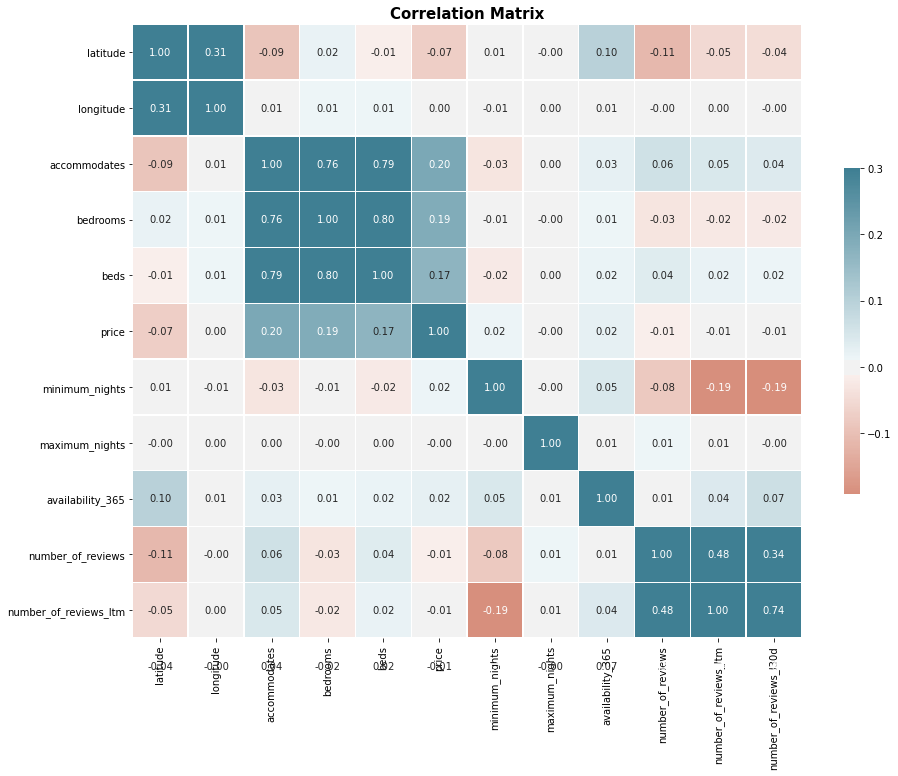

In [190]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=listings_raw.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [191]:
listings_raw.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
count,15261.000000,15261.000000,15261.00000,15261.000000,15261.000000,15261.000000,15261.000000,1.526100e+04,15261.000000,15261.000000,15261.000000,15261.000000
mean,43.682025,-79.396518,3.05596,1.413800,1.659721,155.451674,26.310792,6.622515e+04,131.505799,26.238320,4.198545,0.510058
std,0.049040,0.065824,2.00635,0.804552,1.061723,371.197012,40.175750,8.094839e+06,134.985795,53.502878,11.237775,1.456483
min,43.586490,-79.621200,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,43.645600,-79.425980,2.00000,1.000000,1.000000,67.000000,5.000000,9.100000e+01,0.000000,1.000000,0.000000,0.000000
50%,43.663290,-79.396530,2.00000,1.000000,1.000000,101.000000,28.000000,1.125000e+03,87.000000,5.000000,0.000000,0.000000
75%,43.703990,-79.375700,4.00000,2.000000,2.000000,165.000000,28.000000,1.125000e+03,251.000000,26.000000,3.000000,0.000000
max,43.835260,-79.128010,16.00000,9.000000,18.000000,13000.000000,1125.000000,1.000000e+09,365.000000,828.000000,188.000000,17.000000


155.4516742022148

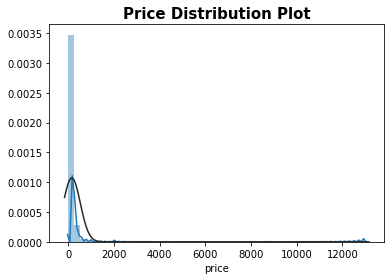

In [192]:
sns.distplot(listings_raw['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')
listings_raw.price.mean()

Text(0.5, 1.0, 'Room Type vs Price')

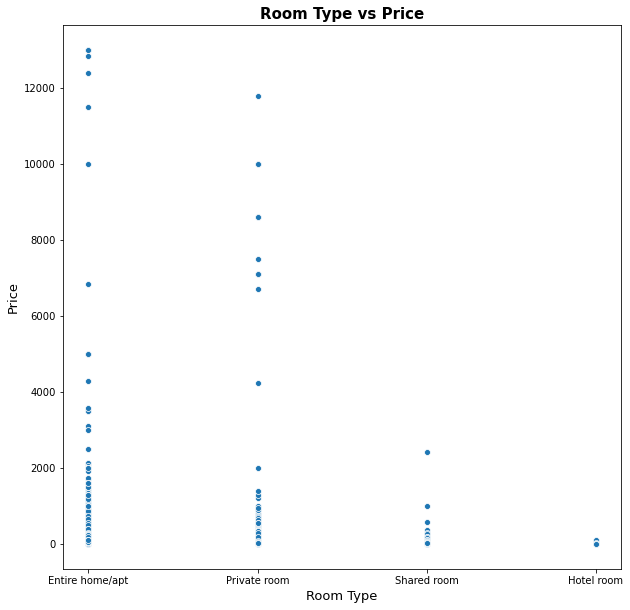

In [193]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='room_type', y='price', data=listings_raw)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

In [194]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       15250 non-null  object 
 1   neighbourhood_cleansed  15261 non-null  object 
 2   latitude                15261 non-null  float64
 3   longitude               15261 non-null  float64
 4   property_type           15261 non-null  object 
 5   room_type               15261 non-null  object 
 6   accommodates            15261 non-null  int64  
 7   bathrooms_text          15248 non-null  object 
 8   bedrooms                15261 non-null  float64
 9   beds                    15261 non-null  float64
 10  amenities               15261 non-null  object 
 11  price                   15261 non-null  float64
 12  minimum_nights          15261 non-null  int64  
 13  maximum_nights          15261 non-null  int64  
 14  availability_365        15261 no